# Projet 1 - MATH2305P
Nom : Edward, Brenton, Simon

## Partie 1 : Les Prérequis et Notations

In [2]:
import sympy as sp
sp.init_printing()

import numpy as np
from sympy import symbols, solve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy.utilities.lambdify import lambdify

Dans notre projet, on va utiliser les notations : 
- Les points de $\mathbb R^3$ : $(x, y, z) \in \mathbb R^3$
- Les équations de codimension 1 dan $\mathbb R^3$, autrement dit, une plane quelconque de $\mathbb R^3$ : $Ax + By + Cz = D$

In [3]:
class Plan():
    def __init__(self):
        self.A, self.B, self.C = sp.symbols("A B C")
        self.x, self.y, self.z = sp.symbols("x y z")
        self.eq =      1 * self.x + \
                  self.A * self.y + \
                  self.B * self.z - \
                  self.C
        # L'équation est exprimée sur la forme : x + Ay + Bz - C = 0

    def solve(self, args=None):
        # TRÈS IMPORTANT : Les arguments doit être dans un tuple ou list
        if args:
            A_real, B_real, C_real = args
            self.eq_to_solve = self.eq.subs({self.A: A_real,
                                             self.B: B_real,
                                             self.C: C_real})

        else:
            self.eq_to_solve = self.eq

        return sp.solve(self.eq_to_solve, (self.x, self.y, self.z))
 
    def plot(self):
        pass

P_test = Plan()
P_test.solve([3, 3, 4]) # Les arguments doit être dans un tuple ou list

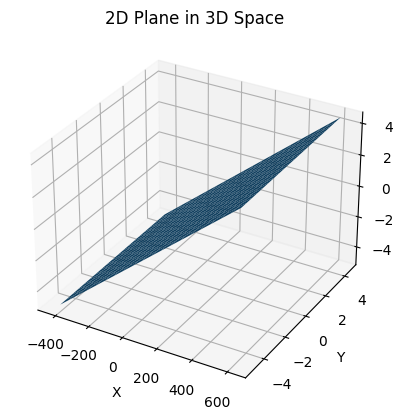

In [4]:
class Plan():
    def __init__(self, args=None):
        # TRÈS IMPORTANT : Les arguments doit être dans un tuple ou list
        self.A,  self.B, self.C = sp.symbols("A B C")
        self.x, self.y, self.z = sp.symbols("x y z")
        self.eq =      1 * self.x + \
                  self.A * self.y + \
                  self.B * self.z - \
                  self.C
        # L'équation est exprimée sur la forme : x + Ay + Bz - C = 0

        if args:
            A_real, B_real, C_real = args
            self.eq_real = self.eq.subs({self.A: A_real,
                                             self.B: B_real,
                                             self.C: C_real})

        else:
            self.eq_real = self.eq

    def solve(self, args=None):
        # TRÈS IMPORTANT : Les arguments doit être dans un tuple ou list
        return sp.solve(self.eq_real, (self.x, self.y, self.z))
 
    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        y_plot, z_plot = np.meshgrid(np.arange(-5, 5, 0.5), np.arange(-5, 5, 0.5))
        
        x_expression = self.solve()[0][0]
        
        x_func = sp.lambdify((self.y, self.z), x_expression)
        x_plot = x_func(y_plot, z_plot)

        ax.plot_surface(x_plot, y_plot, z_plot, alpha=1)

        # Set the labels and title
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.title('2D Plane in 3D Space')


        # Show the plot
        plt.show()

P_test = Plan([1, -110, 124]) # Les arguments doit être dans un tuple ou list
P_test.solve() 
P_test.plot()

Sachant que une point est exprimée sous la forme :
$$
\begin{cases}
A_1 x + B_1 y + C_1 z &= 0 \\ 
A_2 x + B_2 y + C_2 z &= 0 \\ 
A_3 x + B_3 y + C_3 z &= 0 \\ 
\end{cases}
$$

In [5]:
import sympy as sp
sp.init_printing()
X,Y,Z,A1,A2,A3,B1,B2,B3,C1,C2,C3,M,N,P,M1,M2,N1,N2,P1,P2,u1,u2,u3,L_1,L_2,\
=sp.symbols('X,Y,Z,A1,A2,A3,B1,B2,B3,C1,C2,C3,M,N,P,M1,M2,N1,N2,P1,P2,u1,u2,u3,L_1,L_2')


In [8]:
'''
Opération a 
On sait que le plan passe bien par le point déterminé par trois équations,donc le plan est forcément une combinaision 
linéaire de ces trois équations, alors on peut savoir les coéfficients d'une des combinaision possibles par la fonction 'solve',
si le plan que l'on obtient est parallèle au plan donné.

Le point:
X+A1*Y+B1*Z=C1
X+A2*Y+B2*Z=C2
X+A3*Y+B3*Z=C3

Le plan parallèle
X+M*Y+N*Z=P
'''
Q = sp.solve([u1+u2+u3-1,
              u1*A1+u2*A2+u3*A3-M,
              u1*B1+u2*B2+u3*B3-N],
             [u1,u2,u3])
H = sp.Matrix([[1,A1,B1,-C1],
               [1,A2,B2,-C2],
               [1,A3,B3,-C3]])
Result_1 = sp.Matrix([u1, u2, u3]).subs(Q).transpose()*H
Result_1.simplify()
Result_1

⎡         -C₁⋅(A₂⋅B₃ - A₂⋅N - A₃⋅B₂ + A₃⋅N + B₂⋅M - B₃⋅M) + C₂⋅(A₁⋅B₃ - A₁⋅N -
⎢1  M  N  ────────────────────────────────────────────────────────────────────
⎣                                                           A₁⋅B₂ - A₁⋅B₃ - A₂

 A₃⋅B₁ + A₃⋅N + B₁⋅M - B₃⋅M) - C₃⋅(A₁⋅B₂ - A₁⋅N - A₂⋅B₁ + A₂⋅N + B₁⋅M - B₂⋅M)⎤
─────────────────────────────────────────────────────────────────────────────⎥
⋅B₁ + A₂⋅B₃ + A₃⋅B₁ - A₃⋅B₂                                                  ⎦

In [7]:
'''
Opération b
Même pour l'opération b, il faut savoir les coéfficient de la combinaision linéaire.
Pour cette opération, il faut que le plan final soit perpendiculaire à la droite.
On fait alors le produit scalaire de ces coéfficients, et en utilisant la fonction 'solve', on obtient le plan final

Le point:
X+A1*Y+B1*Z=C1
X+A2*Y+B2*Z=C2
X+A3*Y+B3*Z=C3

Le droite perpendiculaire:
X+M1*Y+N1*Z=P1
X+M2*Y+N2*Z=P2
'''

R = sp.solve([(L_1+L_2+1)+(A1+L_1*A2+L_2*A3)*M1+(B1+L_1*B2+L_2*B3)*N1,
             (L_1+L_2+1)+(A1+L_1*A2+L_2*A3)*M2+(B1+L_1*B2+L_2*B3)*N2],
             [L_1,L_2])
Result_2=sp.Matrix([1, L_1, L_2]).subs(R).transpose()*H

###############################################Si le point est sur la droite,假设知道x坐标为x1,对直线X+M1*Y+N1*Z=P1，X+M2*Y+N2*Z=P2

x1,P1,P2 = sp.symbols('x1,P1,P2')

for i in range(len(Result_2)):
    V1[i]=Result_2[i].subs({A1:M1,A2:M2,B1:N1,B2:N2,A3:0,B3:0,C1:P1,C2:P2,C3:x1}).simplify()

'''
Pour une autre droite

X+M3*Y+N3*Z=P3
X+M4*Y+N4*Z=P4

'''
s,x2,M3,M4,N3,N4,P3,P4 =sp.symbols('s,x2,M3,M4,N3,N4,P3,P4')

for i in range(len(V1)):
    V2[i]=V1[i].subs({M1:M3,M2:M4,N1:N3,N2:N4,P1:P3,P2:P4,x1:x2}).simplify()

    
'''   
G1=sp.solve([x1+M1*Y+N1*Z-P1,
             x1+M2*Y+N2*Z-P2],
           [Y,Z])
J1=sp.Matrix([Y,Z]).subs(G1).simplify



G2=sp.solve([x2+M3*Y+N3*Z-P3,
             x2+M4*Y+N4*Z-P4],
           [Y,Z])
J2=sp.Matrix([Y,Z]).subs(G2).simplify
'''

coordonnee_1=sp.solve([V2[0]*x1+
    V2[1]*(-N1*P2 + N1*x1 + N2*P1 - N2*x1)/(M1*N2 - M2*N1)+
    V2[2]*(M1*P2 - M1*x1 - M2*P1 + M2*x1)/(M1*N2 - M2*N1),V1[0]*x2+
    V1[1]*(-N3*P4 + N3*x2 + N4*P3 - N4*x2)/(M3*N4 - M4*N3)+
    V1[2]*(M3*P4 - M3*x2 - M4*P3 + M4*x2)/(M3*N4 - M4*N3)-V1[3]],[x1,x2])

x_yi=sp.Matrix([x1,x2]).subs(coordonnee_1)
x_yi.simplify()
print(x_yi)

for i in range(len(V1)):
    V1[i].subs({x1:x_yi[0],x2:x_yi[1]}).simplify()
    V2[i].subs({x1:x_yi[0],x2:x_yi[1]}).simplify()
    
La_droite_pp=[V1,V2]
print(La_droite_pp)##################################################################公垂线




    

NameError: name 'V1' is not defined

接下来是具体的数值实现（对operation a和b）

In [ ]:
import numpy as np

(A1,A2,A3,B1,B2,B3,C1,C2,C3)=(1,2,3,6,5,10,5,4,9)    #点坐标的三个方程
H = np.array([[1,A1,B1,-C1],
               [1,A2,B2,-C2],
               [1,A3,B3,-C3]])

In [ ]:
def get_that_plan_a(M,N):
    Q1 = np.array([[1,1,1],
              [A1,A2,A3],
              [B1,B2,B3]]
             )
    Q2=np.array([[1],[M],[N]])

    x = np.linalg.solve(Q1, Q2)
    Result_1 = np.array(x)*H
    t=Result_1[0]+Result_1[1]+Result_1[2]
    return t

def get_that_plan_b(M1,M2,N1,N2):
    L_1=(-A1*B3*M1*N2 + A1*B3*M2*N1 - A1*M1 + A1*M2 + A3*B1*M1*N2 - A3*B1*M2*N1 + A3*M1 - A3*M2 - B1*N1 + B1*N2 + B3*N1 - B3*N2)/(A2*B3*M1*N2 - A2*B3*M2*N1 + A2*M1 - A2*M2 - A3*B2*M1*N2 + A3*B2*M2*N1 - A3*M1 + A3*M2 + B2*N1 - B2*N2 - B3*N1 + B3*N2)
    L_2=(A1*B2*M1*N2 - A1*B2*M2*N1 + A1*M1 - A1*M2 - A2*B1*M1*N2 + A2*B1*M2*N1 - A2*M1 + A2*M2 + B1*N1 - B1*N2 - B2*N1 + B2*N2)/(A2*B3*M1*N2 - A2*B3*M2*N1 + A2*M1 - A2*M2 - A3*B2*M1*N2 + A3*B2*M2*N1 - A3*M1 + A3*M2 + B2*N1 - B2*N2 - B3*N1 + B3*N2)
    y=[[1],[L_1],[L_2]]

    Result_2=y*H
    r=Result_2[0]+Result_2[1]+Result_2[2]
    return r    

print(get_that_plan_a(10,19))
print(get_that_plan_b(1,2,3,4))

[  1.  10.  19. -18.]
[ 3.   1.5 -1.5  4.5]


In [ ]:
'''
对于两个不同直线，假设系数分别为
X+M1*Y+N1*Z=P1
X+M2*Y+N2*Z=P2

X+M3*Y+N3*Z=P3
X+M4*Y+N4*Z=P4

这里没有给出定点，我们于是可以假设点（X_1,Y_1,Z_1),(X_2,Y_2,Z_2)
由于是直线，这里的Y_1,Z_1,Y_2,Z_2都是可以用X_1,X_2表达的
通过operationb我们可以得到分别的垂面，
如果解得两个面的交线（用solve可以得到分别的表达式）过这两点即可

'''
X,Y,Z=sp.symbols('X Y Z')
sp.solve(X+M1*Y+N1*Z-P1,X+M2*Y+N2*Z-P2)



NameError: name 'P1' is not defined